# Sci Viz tools

In [66]:
%matplotlib inline

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# note: I had to make sure my conda enviornment was for python 3
#  hopefully this won't be a problem for students

#lets install something called yt
#!pip install yt
#!pip install yt --user if you need to

import yt

In [9]:
# students will need to install this via the yt website
# make the download link as: http://yt-project.org/data/IsolatedGalaxy.tar.gz
ds = yt.load("/Users/jillnaiman1/data/IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2019-03-28 13:52:56,609 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2019-03-28 13:52:56,610 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-03-28 13:52:56,611 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-28 13:52:56,612 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-28 13:52:56,612 Parameters: cosmological_simulation   = 0.0


In [10]:
# print out various stats of this dataset
ds.print_stats()
# this is basically telling us something about the 
#  number of data points in the dataset
#  don't worry if you don't know what levels, grids or cells are at this point
#  we'll get to it later

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 9518.63it/s]
yt : [INFO     ] 2019-03-28 13:52:58,071 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc
	Width: 1.221e+02 pc
	Width: 2.518e+07 AU
	Width: 3.767e+20 cm


In [11]:
# same thing with field list, its cool if some of these look less familiar then others
ds.field_list
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al

In [12]:
# this is a 3D simululation of a galaxy, lets check out some stats about the box
ds.domain_right_edge, ds.domain_left_edge
# what this is saying is the box goes from (0,0,0) to (1,1,1) in "code_length" units
#  basically, this is just a normalized box

(YTArray([1., 1., 1.]) code_length, YTArray([0., 0., 0.]) code_length)

yt : [INFO     ] 2019-03-28 13:53:20,462 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 13:53:20,463 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 13:53:20,464 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2019-03-28 13:53:20,607 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



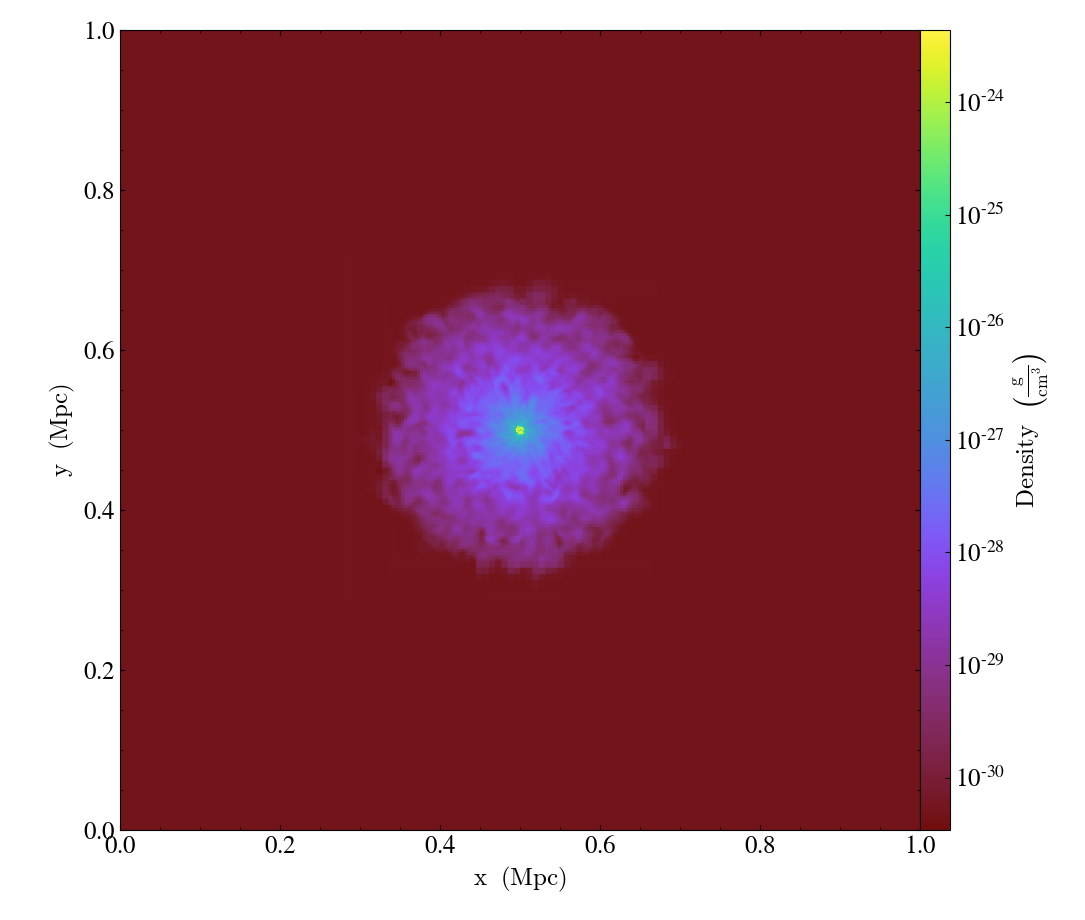

In [14]:
# ok, lets make a quick plot 1/2 down the z-direction
p = ds.r[:, :, 0.5].plot("density")

yt : [INFO     ] 2019-03-28 13:53:37,574 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2019-03-28 13:53:37,581 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



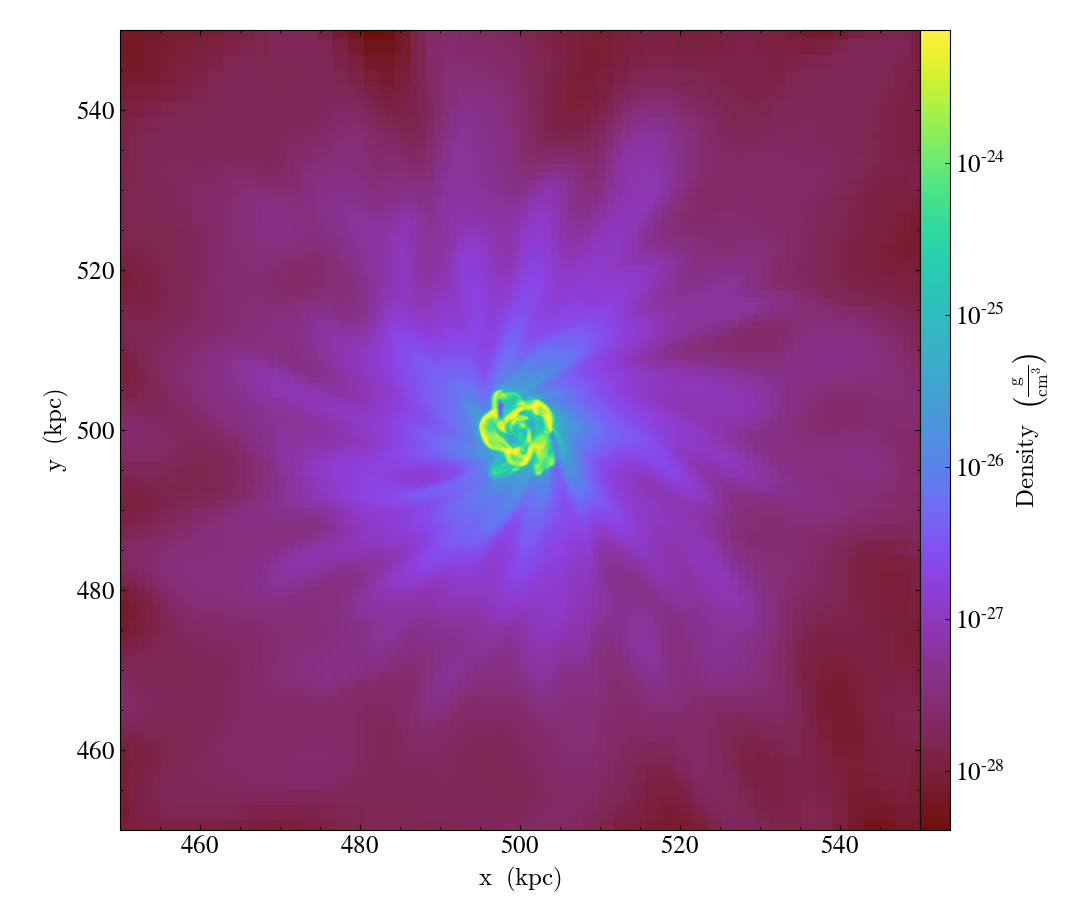

In [15]:
# lets zoom
p.zoom(10)

In [16]:
# you can also do fun things like print out max & min densities
ds.r[:].max("density"), ds.r[:].min("density")
# the above is for the whole box

(7.73426503924e-24 g/cm**3, 8.472937507539987e-32 g/cm**3)

In [17]:
# we can also use yt to play with other sorts of data:
import h5py # might have to pip install

In [34]:
with h5py.File("/Users/jillnaiman1/Downloads/single_dicom.h5", "r") as f:
    scan_data = f["/scan"][:]

In [35]:
scan_data.shape

(36, 512, 512)

In [36]:
import numpy as np

In [37]:
dsd = yt.load_uniform_grid({'scan': scan_data},
                     [36, 512, 512],
                     length_unit = yt.units.cm,
                     bbox = np.array([[0., 10], [0, 10], [0, 10]]),
)

yt : [INFO     ] 2019-03-28 14:00:02,825 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-03-28 14:00:02,826 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2019-03-28 14:00:02,827 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-28 14:00:02,828 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2019-03-28 14:00:02,829 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2019-03-28 14:00:05,244 Projection completed
yt : [INFO     ] 2019-03-28 14:00:05,246 xlim = 0.000000 10.000000
yt : [INFO     ] 2019-03-28 14:00:05,247 ylim = 0.000000 10.000000
yt : [INFO     ] 2019-03-28 14:00:05,249 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



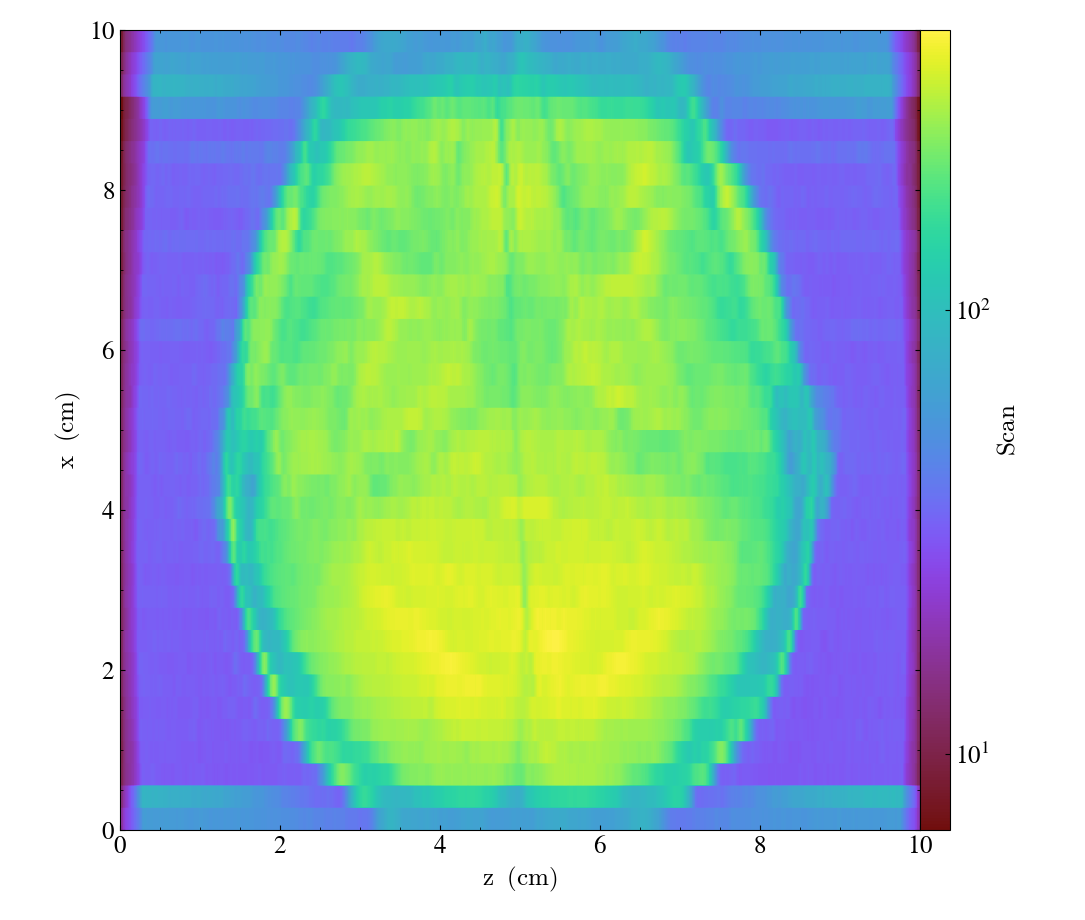

In [38]:
dsd.r[:].mean("scan", axis="y").plot(); # this takes the mean along the specified axis "y" and plots
# can also do .max or .min

In [39]:
dsd.field_list

[('stream', 'scan')]

yt : [INFO     ] 2019-03-28 14:00:05,613 xlim = 0.000000 10.000000
yt : [INFO     ] 2019-03-28 14:00:05,614 ylim = 0.000000 10.000000
yt : [INFO     ] 2019-03-28 14:00:05,615 Making a fixed resolution buffer of (scan) 800 by 800
yt : [INFO     ] 2019-03-28 14:00:05,876 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



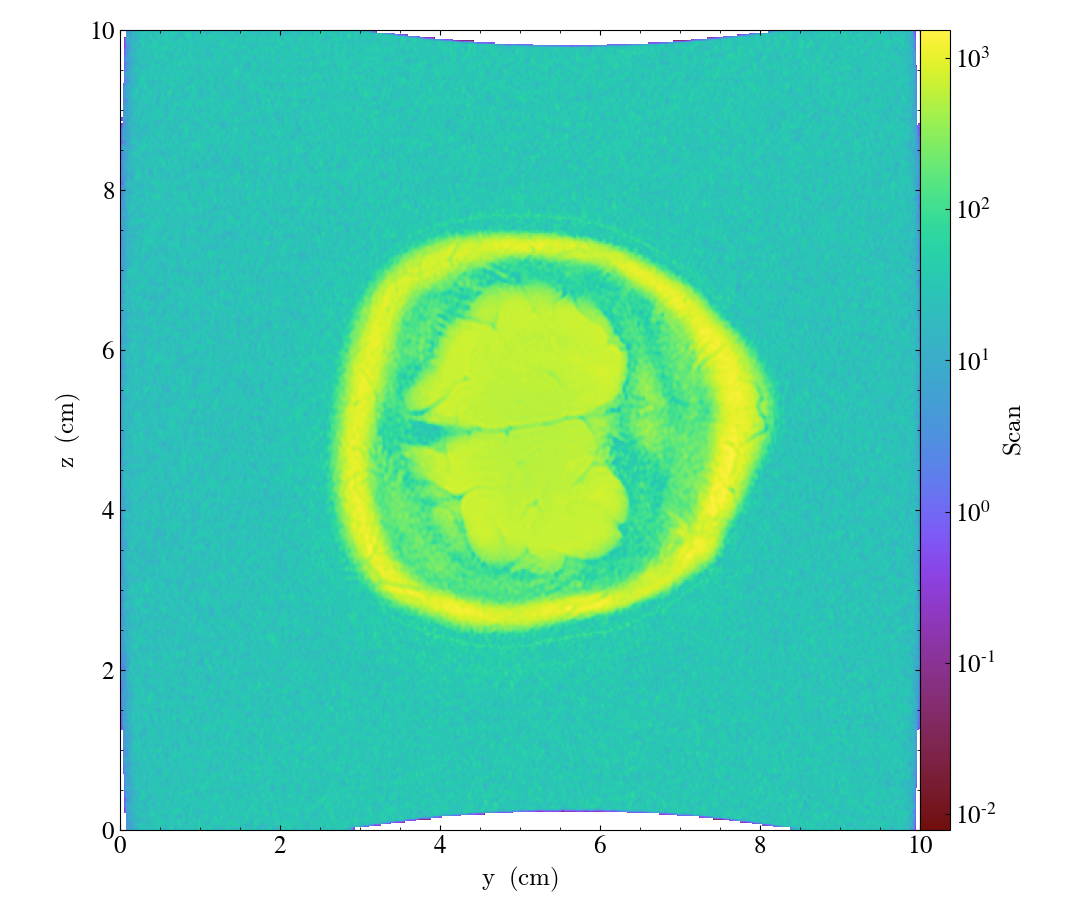

In [40]:
dsd.r[0.75,:,:].plot('scan'); # this takes the mean along the specified axis "y" and plots
